reading file: /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/geomap_4rlks_tight.trans
finding approximate radar coordinate with 2D linear transformation estimation.
    using four corner lat/lon info from /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/temporal_coherence.h5 file.
Residul - rg: 5, az: 1
data   coverage in y/x: (0, 0, 2792, 2299)
subset coverage in y/x: (0, 0, 2792, 2299)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: gray
ascending orbit
data    unit: 1
display unit: 1
data    range: 0.000232566615477 - 1.0
display range: 0.000232566615477 - 1.0
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
plot reference point
flip figure up   and down


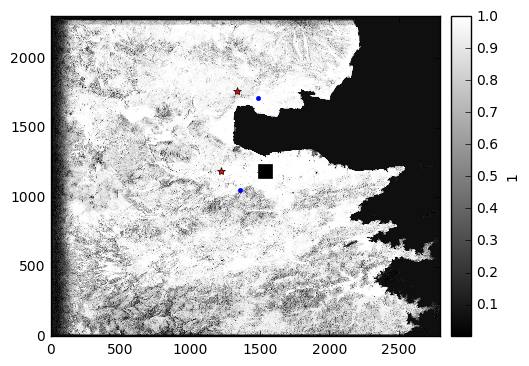

In [2]:
'''Convert geo coord into radar coord: comparison between using geomapFile and using corner lat/lon'''
import numpy as np
import matplotlib.pyplot as plt
import pysar._readfile as readfile
import pysar._pysar_utilities as ut
import pysar.view as view

work_dir = '/Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES'
geomapFile = work_dir+'/geomap_4rlks_tight.trans'
rdrFile = work_dir+'/temporal_coherence.h5'

lat=np.array([33.2, 33.4])
lon=np.array([131.5, 131.5])

az0, rg0 = ut.glob2radar(lat, lon, geomapFile, rdrFile)[0:2]
az1, rg1 = ut.glob2radar(lat, lon, None, rdrFile)[0:2]

img, atr = readfile.read(rdrFile)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax = view.plot_matrix(ax, img, atr)[0]

ax.plot(rg0, az0, 'r*')  #using geomap*.trans, accurate
ax.plot(rg1, az1, 'b.')  #using corner lat/lon, not accurate

plt.show()